In [9]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from scipy import stats

In [11]:
sns.set_style('darkgrid')

The IQ test scores of 31 individuals:

In [5]:
scores = np.array([114, 100, 104, 89, 102, 91, 114, 114, 103, 105, 108,
                   130, 120, 132, 111, 128, 118, 119, 86, 72, 111, 103, 
                   74, 112, 107,103, 98, 96, 112, 112, 93])

A stem plot of the distribution of these 31 scores shows that there are no major
departures from normality, and thus we assume the distribution of the scores
to be close to normal. Estimate the mean IQ score for this population, using a 99
percent confidence interval.

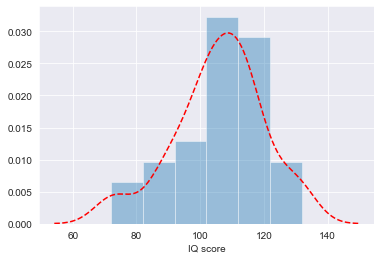

In [24]:
sns.distplot(scores, hist = True, kde = True, bins = 6,
             norm_hist = True, kde_kws = dict(ls = '--', color = 'r'), 
             axlabel = 'IQ score', label = 'IQ score distribution')

In [37]:
#99% confidence interval for normal distribution: zcrit =  2.576.
zcrit = 2.576
n = scores.size
mean, std = scores.mean(), scores.std()
ci = (mean - zcrit * std / np.sqrt(n), mean + zcrit * std / np.sqrt(n))
f'Confidence Interval: {ci}'

'Confidence Interval: (99.34322371552975, 112.33419563930897)'

let's use Scipy to do all the work

In [39]:
from scipy.stats import bayes_mvs

In [63]:
bayes_mvs(scores)

(Mean(statistic=105.83870967741936, minmax=(101.48825534263035, 110.18916401220837)),
 Variance(statistic=218.22119815668196, minmax=(139.58827316343616, 330.41180792476985)),
 Std_dev(statistic=14.641031052831618, minmax=(11.814748121032297, 18.17723323074141)))

Confidence interval of a normal distribution:

In [58]:
from scipy.stats import norm

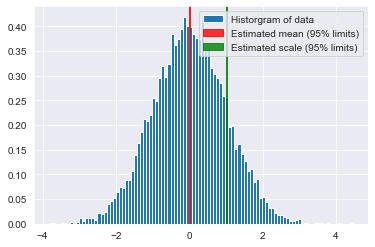

In [71]:
sample = norm.rvs(size = 10000)
#95% confidence interval
mean, var, std = bayes_mvs(sample, alpha = .95)

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(sample, bins = 100, density = True, label = 'Historgram of data')
ax.axvspan(mean.minmax[0], mean.minmax[1], color = 'r', label = 'Estimated mean (95% limits)', alpha = .8)
ax.axvspan(std.minmax[0], std.minmax[1], color = 'g', label = 'Estimated scale (95% limits)', alpha = .8)
ax.legend()

In [62]:
mean

Mean(statistic=9.970808804420786, minmax=(9.91271385939982, 10.028903749441751))